In [13]:
from spherical_analysis import *
from skimage import io
import numpy as np

This example notebook will demonstrate how to determine an appropriate padding width for a dataset and select the quantile threshold for clipping the images.  
It is necessary to select an appropriate padding width such that the images won't get clipped if rotated. It is also necessary to select the quantile threshold well enough such that it removes most of the background and yolk, leaving only the cells on the surface of the embryo while the rest of the image is 0, and makes it easy to determine the center of and radius of the embryo.

Unfortunately, I do not know of an automated way to do this so it will have to be trial and error. 

In [ ]:
# Function for visualizing the padding and clipping process
def clip_pad_image(image, alpha, padding, visual=False):
    """Clips image at the alpha_th quantile. In addition, pads the image Can visualize if necessary."""
    q = [alpha, 1 - alpha]
    mquantiles = stats.mstats.mquantiles(image.flatten(), prob=q)
    img_clip = np.clip(image - mquantiles[0], a_min=0, a_max=np.inf)
    img_final = np.pad(img_clip, pad_width=padding, mode='constant', constant_values=0)

    if visual:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 6))
        ax1.imshow(img_final[img_final.shape[0]//2, ...])
        hist_c, hist_c_centers = exposure.histogram(img_clip)
        hist, hist_centers = exposure.histogram(image) 
        ax2.plot(hist_c_centers, hist_c)
        ax3.plot(hist_centers, hist)
        ax1.set_title("Clipped image")   
        ax2.set_title("Clipped histogram")
        ax3.set_title("Original histogram")    

    return img_final

It is convienient before this step to have chosen a `seed_time`, which a time when an embryo is almost finished with epiboly $-$ something which can be easily determined by looking at timepoints in FIJI. At this stage, the embryo's intensity distribution is well approximated by a spherical shell with a well defined radius, making it a good timepoint to start the radii and center detection on once the padding and clipping parameters have been figured out.  

Under normal development conditions, epiboly would finish somewhere between 8.5 to 9.5 hpf. For movies taken at 6 hpf and a temporal resolution of 5 minutes, this would correspond to timepoints between 30 to 42.  

For this example, I'm going to choose timepoint 40

In [8]:
# Read in image
im = io.imread('/mnt/data1/Code/GH_local/DS8_20230710735_downsampled_0point25x/DS_TP40_Ch0_Ill0_Ang0,45,90,135,180,225,270,315.tif')
print(im.shape)

(522, 351, 484)


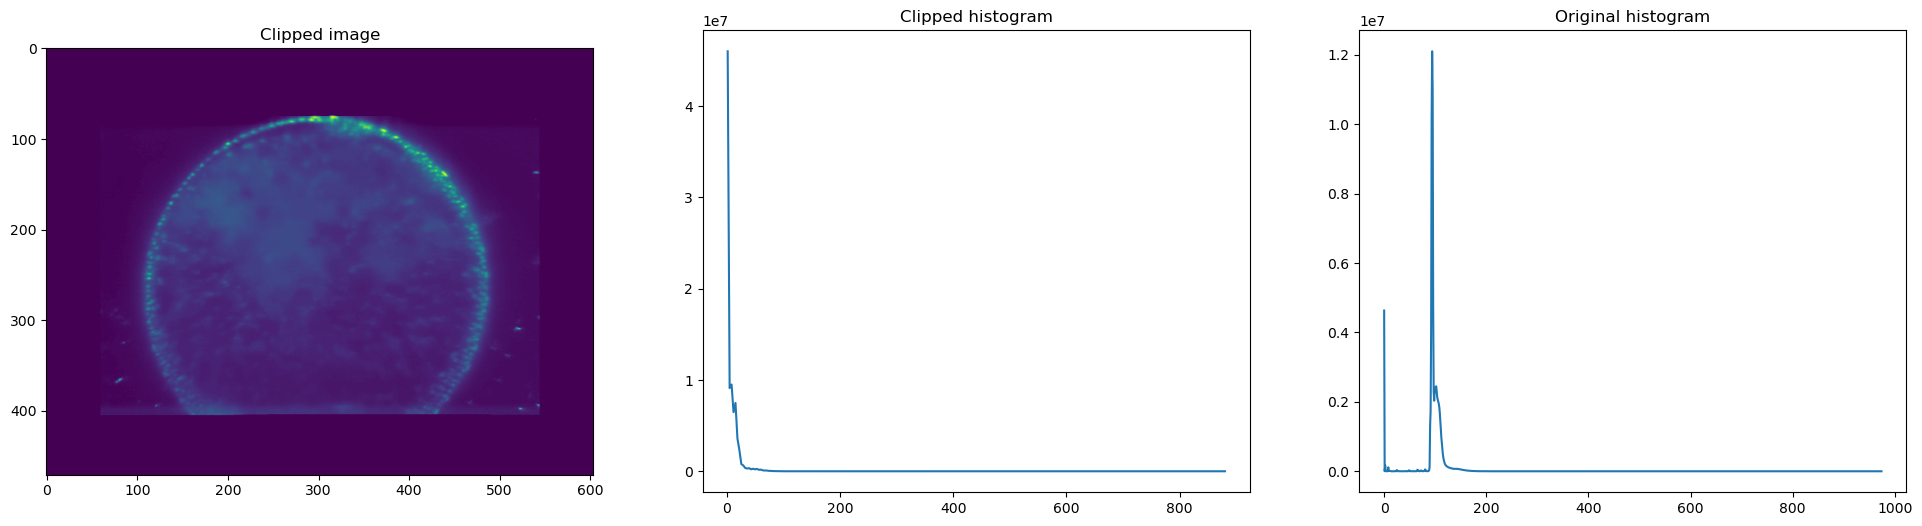

In [ ]:
# the quantile of that you want to clip at
alpha = 0.1
# amount to pad the image
padding = 60
result = clip_pad_image(im, alpha, padding, visual=True)

The padding looks good enough, but the quantile at which we are clipping at is too low, since we still have background and yolk intensity. 

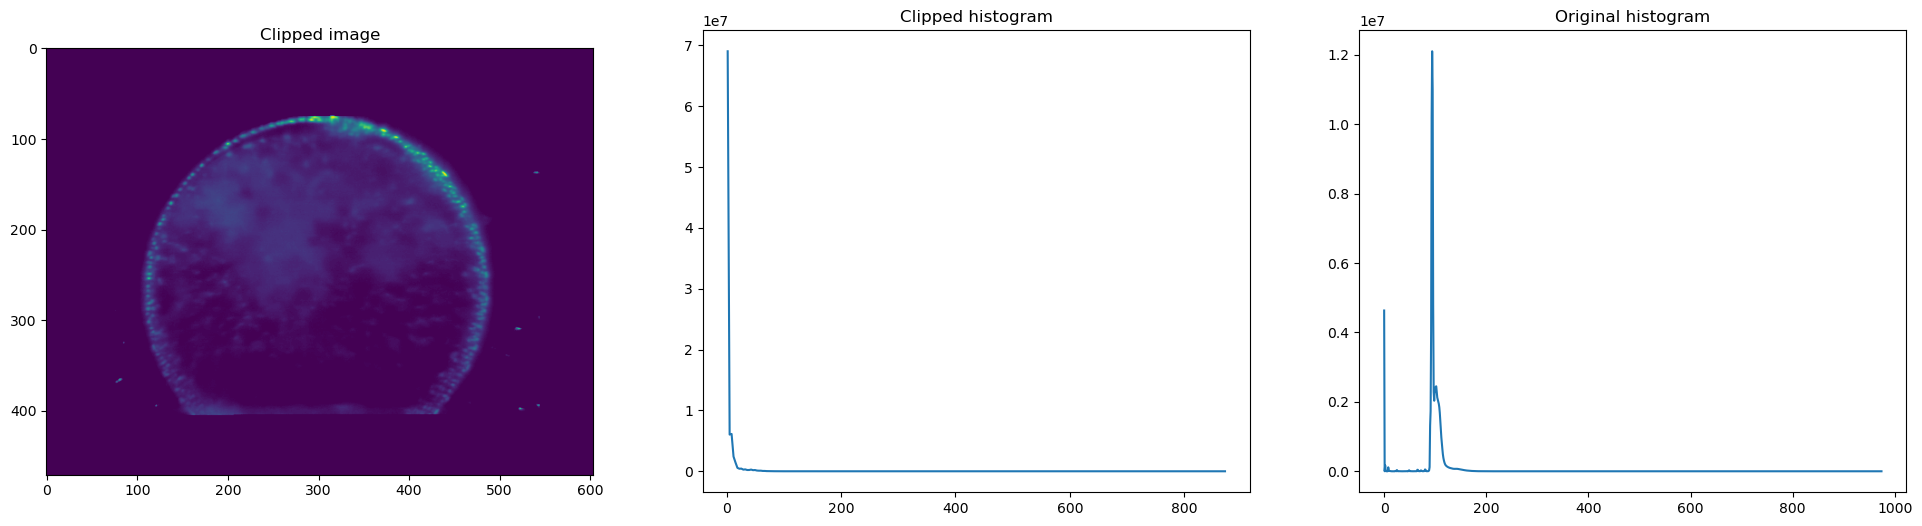

In [11]:
# try clipping at the 0.7 quantile
alpha = 0.7
result = clip_pad_image(im, alpha, 60, visual=True)

This looks good enough. There is not much yolk left and most of the background is clipped out.

In [12]:
# final parameter values for this dataset
alpha = 0.7
padding = 60